## 1. Set up

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib


In [2]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
aiohappyeyeballs          2.4.3
aiohttp                   3.10.11
aiosignal                 1.3.1
altair                    5.4.1
annotated-types           0.7.0
anyio                     4.5.2
astunparse                1.6.3
async-timeout             4.0.3
attrs                     24.2.0
backoff                   2.2.1
backports.zoneinfo        0.2.1
blinker                   1.8.2
blis                      0.7.11
branca                    0.8.0
cachetools                5.5.1
catalogue                 2.0.10
certifi                   2025.1.31
chardet                   3.0.4
charset-normalizer        3.4.1
click                     8.1.7
confection                0.1.5
contourpy                 1.1.1
cssselect                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
dataclasses-json          0.6.7
dateparser                1.2.0
decorator             

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 2. Remove dodgy images

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/var/folders/n8/v9ww031d5m1g616hh9q833700000gn/T/ipykernel_2907/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir)

['Camera_images', 'Ai_Images']

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
#Reading an Image
img = cv2.imread(os.path.join('data','Camera_images','199.jpg'))
img

array([[[197, 193, 152],
        [194, 188, 147],
        [195, 184, 146],
        ...,
        [188, 162,  96],
        [189, 166, 104],
        [190, 171, 110]],

       [[197, 189, 149],
        [195, 185, 145],
        [196, 184, 144],
        ...,
        [190, 164,  98],
        [188, 165, 103],
        [189, 168, 107]],

       [[202, 190, 148],
        [199, 187, 145],
        [200, 186, 144],
        ...,
        [197, 169, 104],
        [192, 169, 107],
        [191, 169, 111]],

       ...,

       [[157, 103,  38],
        [157, 105,  39],
        [158, 106,  39],
        ...,
        [155, 129,  83],
        [153, 129,  83],
        [153, 128,  84]],

       [[156, 102,  37],
        [156, 104,  38],
        [158, 106,  39],
        ...,
        [155, 129,  83],
        [153, 129,  83],
        [153, 128,  84]],

       [[155, 103,  37],
        [156, 104,  38],
        [155, 105,  39],
        ...,
        [155, 128,  84],
        [153, 128,  84],
        [153, 128,  84]]

In [11]:
img.shape #1150 pixels high, 1536 pixels wide and have 3 channels (Coloured Image)

(1150, 1536, 3)

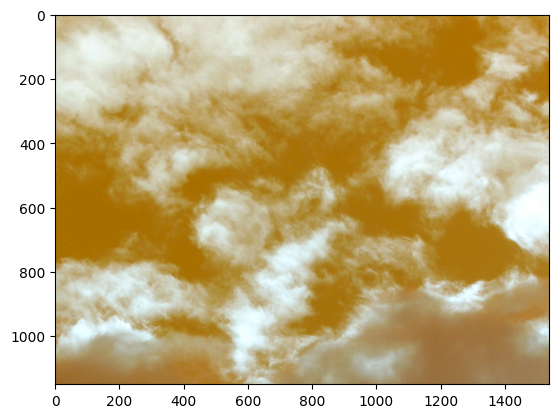

In [12]:
plt.imshow(img) 
#This has weird colour because cv reads picture in GBR and matplot expects RGB

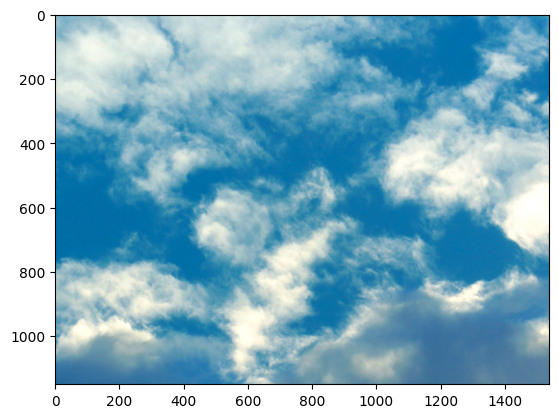

In [13]:
#Fix weird colour
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

## 3.Load Data

In [14]:

import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 453 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()


In [17]:
batch = data_iterator.next()


In [18]:
len(batch) #The two parts is images and labels

2

In [19]:
batch[1] #1s and 0s represent either AI or real

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

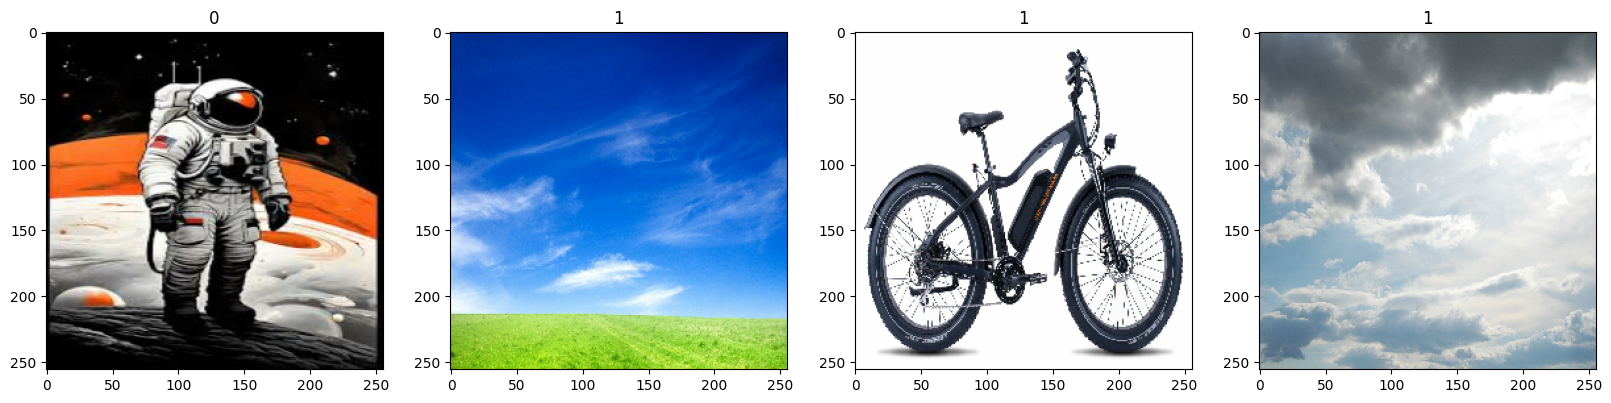

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
#By going through image data, I figured that 1 is Camera and 0 is AI. 
#This can change with different dataset

## 4. Preprocess Data

Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))


In [22]:
data.as_numpy_iterator().next()


(array([[[[1.26225486e-01, 1.30147055e-01, 1.06617644e-01],
          [5.25275730e-02, 6.42922819e-02, 3.68412994e-02],
          [8.79136026e-02, 9.86979157e-02, 7.17371330e-02],
          ...,
          [1.98774517e-01, 2.14460790e-01, 2.49754906e-01],
          [1.91421568e-01, 2.07107842e-01, 2.42401958e-01],
          [1.96063116e-01, 2.15670958e-01, 2.29886636e-01]],
 
         [[1.71078429e-01, 1.74999997e-01, 1.51470587e-01],
          [5.14705889e-02, 6.32352978e-02, 3.57843153e-02],
          [1.09068625e-01, 1.19852938e-01, 9.28921551e-02],
          ...,
          [1.79411769e-01, 1.95098042e-01, 2.30392158e-01],
          [2.02098653e-01, 2.17784926e-01, 2.53079057e-01],
          [1.91053927e-01, 2.10661769e-01, 2.24877447e-01]],
 
         [[1.37637869e-01, 1.41559437e-01, 1.18030027e-01],
          [4.30147052e-02, 4.69362736e-02, 2.34068632e-02],
          [1.14813112e-01, 1.18734680e-01, 9.52052698e-02],
          ...,
          [1.71476722e-01, 1.81770831e-01, 2.0971

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [26]:
batch[0].max()

np.float32(1.0)

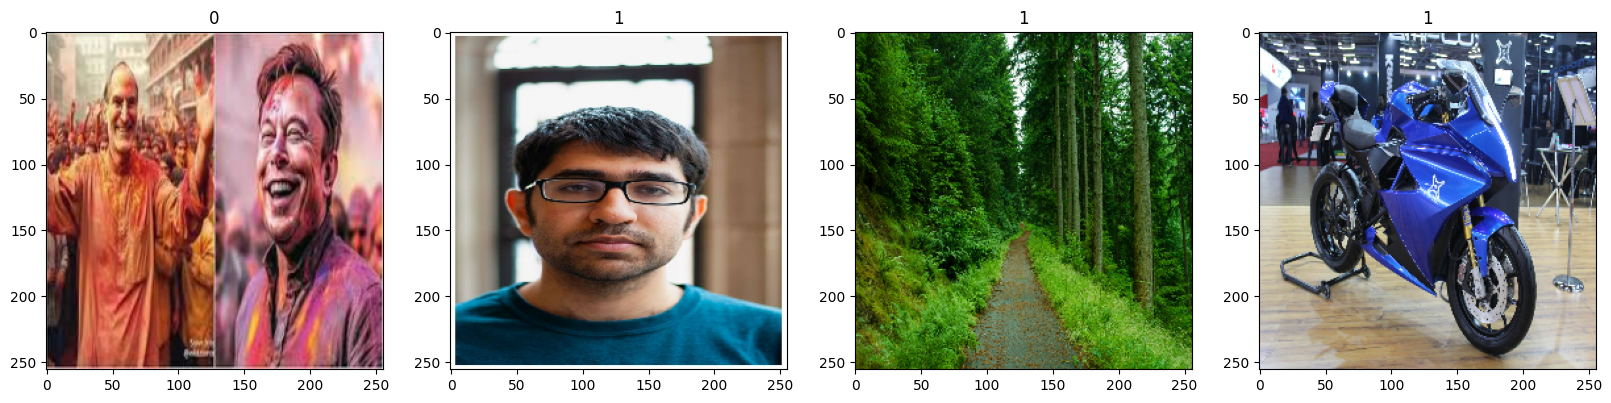

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 5. Split Data

In [28]:
len(data) #This means we have 15 batches. Each batch has 32 images

15

In [29]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [30]:
train_size #32*10 = 320 images

10

In [31]:
val_size #32*3 = 96 images 

3

In [32]:
test_size #32*2 = 64 images

2

In [33]:
train_size+val_size+test_size

15

In [34]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(train)

10

## 6. Build DL Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer

In [37]:
model = Sequential()


In [38]:
#Original
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [40]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

In [136]:
logdir='logs'


In [137]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [138]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.5354 - loss: 0.7670 - val_accuracy: 0.5521 - val_loss: 0.6881
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.5433 - loss: 0.6822 - val_accuracy: 0.5521 - val_loss: 0.6637
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.6109 - loss: 0.6240 - val_accuracy: 0.8333 - val_loss: 0.5717
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step - accuracy: 0.7021 - loss: 0.5801 - val_accuracy: 0.8229 - val_loss: 0.4891
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 445ms/step - accuracy: 0.8252 - loss: 0.4611 - val_accuracy: 0.7812 - val_loss: 0.4266
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.7840 - loss: 0.4873 - val_accuracy: 0.8854 - val_loss: 0.3613
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 427ms/step - accuracy: 0.8530 - loss: 0.3327 - val_accuracy: 0.8750 - val_loss: 0.3513
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - accuracy: 0.9284 - loss: 0.2695 - val_accuracy: 0.

In [139]:
hist.history #Shows loss, accuracy, val_loss and val_accuracy infor

{'accuracy': [0.550000011920929,
  0.543749988079071,
  0.640625,
  0.684374988079071,
  0.8187500238418579,
  0.809374988079071,
  0.856249988079071,
  0.940625011920929,
  0.953125,
  0.9468749761581421,
  0.96875,
  0.987500011920929,
  0.981249988079071,
  0.9937499761581421,
  1.0,
  0.9906250238418579,
  0.9937499761581421,
  1.0,
  1.0,
  1.0],
 'loss': [0.7358649373054504,
  0.6713014841079712,
  0.627269446849823,
  0.5729717016220093,
  0.44929972290992737,
  0.44019919633865356,
  0.33534884452819824,
  0.23220905661582947,
  0.17543178796768188,
  0.14647802710533142,
  0.1092837005853653,
  0.05684029310941696,
  0.050924547016620636,
  0.027245724573731422,
  0.02286209538578987,
  0.03424716368317604,
  0.03239167109131813,
  0.02219320833683014,
  0.01252933032810688,
  0.005073833279311657],
 'val_accuracy': [0.5520833134651184,
  0.5520833134651184,
  0.8333333134651184,
  0.8229166865348816,
  0.78125,
  0.8854166865348816,
  0.875,
  0.9375,
  0.96875,
  1.0,
  0.98

Plot Performance

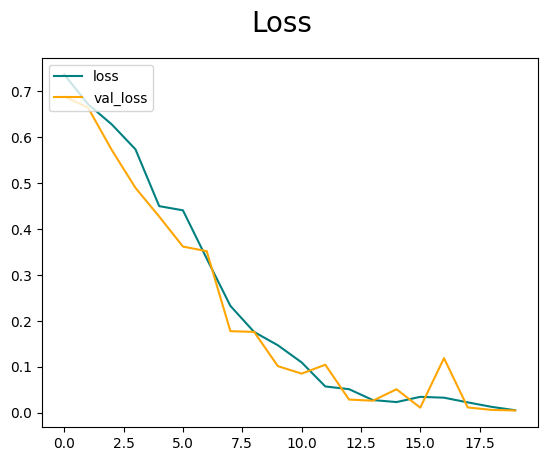

In [140]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


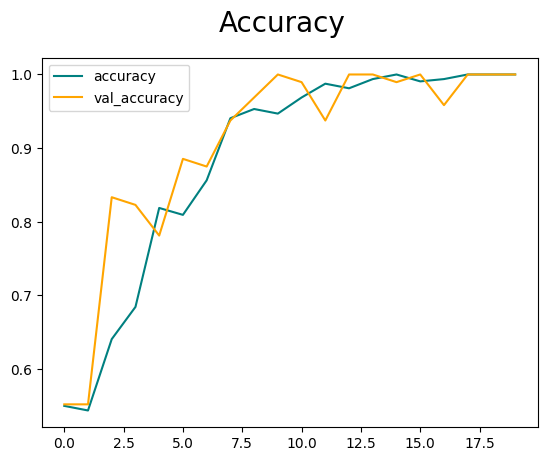

In [141]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 8. Evaluate

In [142]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [143]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [144]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


2025-02-05 01:42:35.196981: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [145]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [146]:
print(f'Precision:{pre.result().numpy()}, \nRecall:{re.result().numpy()}, \nAccuracy:{acc.result().numpy()}')

Precision:1.0, 
Recall:1.0, 
Accuracy:1.0


## 9.Test

In [147]:
import cv2

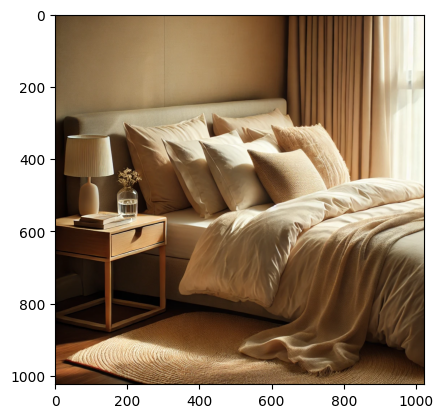

In [148]:
img = cv2.imread('test_f7.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

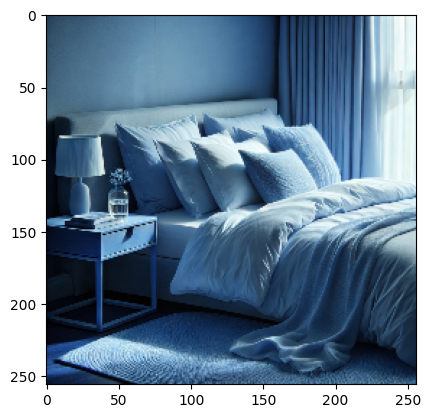

In [149]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [151]:
yhat

array([[0.00420207]], dtype=float32)

In [152]:
if yhat > 0.5: 
    print(f'Predicted class is Real')
else:
    print(f'Predicted class is AI-Generated')

Predicted class is AI-Generated


## 10. Save the model

In [153]:
from tensorflow.keras.models import load_model


In [154]:
#model.save(os.path.join('models','imageclassifier.keras'))


In [155]:
#new_model = load_model(os.path.join('models','imageclassifier.keras'))


In [ ]:
#new_model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.00420207]], dtype=float32)

In [171]:
model.export('saved_model')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  5127909264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5127911568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128831248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128832784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128832208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128833552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5127912528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5127897360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128832976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5128834320: TensorSpec(shape=(), dtype=tf.resource, name=None)
